## Exploration Data Analysis and Visualization

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# File directory
dirctory = '/Users/amy/Desktop/MS Course/intro to data management/Project/US/'
file = 'Times Higher Education.csv'

### Data Loading and Sanity Check

In [3]:
df = pd.read_csv(dirctory + file,encoding= 'unicode_escape')

df_raw = df.copy()

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(3) # head() first 5 rows - default , tail() last 5 rows

rank              ranking-institution-title  \
0    1                     Harvard University   
1    2                    Columbia University   
2    3  Massachusetts Institute of Technology   

                      ranking-institution-title href       location overall  \
0  https://www.timeshighereducation.com/world-uni...  Massachusetts    91.9   
1  https://www.timeshighereducation.com/world-uni...       New York    90.6   
2  https://www.timeshighereducation.com/world-uni...  Massachusetts    90.4   

  resources engagement outcomes enviroment  
0      29.8       15.6     39.5          7  
1        27       16.7       39        7.8  
2      29.2       15.8     38.2        7.2

In [6]:
df.shape

(1056, 9)

In [7]:
df.columns # .rename() rename column name

Index(['rank', 'ranking-institution-title', 'ranking-institution-title href',
       'location', 'overall', 'resources', 'engagement', 'outcomes',
       'enviroment'],
      dtype='object')

### Column data type

In [8]:
df.dtypes

rank                              object
ranking-institution-title         object
ranking-institution-title href    object
location                          object
overall                           object
resources                         object
engagement                        object
outcomes                          object
enviroment                        object
dtype: object

In [9]:
# check for what value is not able to convert to float
for x in df['overall']:
    try:
        float(x)
    except:
        print(x)

45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
45.2-48.0
40.3-45.1
40.3-45.1
40.3-45.1
40.3-45.1
40.3-45.1


In [10]:
# can't covnert string to float as shown below
float('23.7-40.2')

ValueError: could not convert string to float: '23.7-40.2'

In [11]:
# WRONG ACTION:  conver entre colum to numerica, some result NaN while there's actual value
# df['overall'] = df['overall'].apply(pd.to_numeric, errors='coerce')

In [12]:
df[1051:1055]

rank            ranking-institution-title  \
1051  > 800  University of Wisconsin-Platteville   
1052  > 800  University of Wisconsin-River Falls   
1053  > 800   University of Wisconsin-Whitewater   
1054  > 800           Worcester State University   

                         ranking-institution-title href       location  \
1051  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1052  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1053  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1054  https://www.timeshighereducation.com/world-uni...  Massachusetts   

        overall resources engagement outcomes enviroment  
1051  23.7-40.2         -          -     16.5          -  
1052  23.7-40.2         -          -        -          -  
1053  23.7-40.2         -          -        -          -  
1054  23.7-40.2         -          -        -          -

In [15]:
# write a function to preprocess the numeric column,
# replace '-' with 0 and '20-30' extract first number
# then convert to float()
def proc(x):
    first_num = x.split('-')[0] or 0
    return float(first_num) 
        

In [16]:
# preprocess the numeric column,
for x in ['overall','resources', 'engagement', 'outcomes']:
          df[x]=df[x].apply(proc)

In [17]:
df[1051:1055]

rank            ranking-institution-title  \
1051  > 800  University of Wisconsin-Platteville   
1052  > 800  University of Wisconsin-River Falls   
1053  > 800   University of Wisconsin-Whitewater   
1054  > 800           Worcester State University   

                         ranking-institution-title href       location  \
1051  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1052  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1053  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1054  https://www.timeshighereducation.com/world-uni...  Massachusetts   

      overall  resources  engagement  outcomes enviroment     c  
1051     23.7        0.0         0.0      16.5          -  23.7  
1052     23.7        0.0         0.0       0.0          -  23.7  
1053     23.7        0.0         0.0       0.0          -  23.7  
1054     23.7        0.0         0.0       0.0          -  23.7

In [18]:
# convert to numeric

df[['overall', 'resources', 'engagement', 'outcomes','enviroment']] = \
    df[['overall', 'resources', 'engagement', 'outcomes','enviroment']].apply(pd.to_numeric, errors='coerce')

In [19]:
df.dtypes

rank                               object
ranking-institution-title          object
ranking-institution-title href     object
location                           object
overall                           float64
resources                         float64
engagement                        float64
outcomes                          float64
enviroment                        float64
c                                 float64
dtype: object

In [20]:
df[1051:1055]

rank            ranking-institution-title  \
1051  > 800  University of Wisconsin-Platteville   
1052  > 800  University of Wisconsin-River Falls   
1053  > 800   University of Wisconsin-Whitewater   
1054  > 800           Worcester State University   

                         ranking-institution-title href       location  \
1051  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1052  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1053  https://www.timeshighereducation.com/world-uni...      Wisconsin   
1054  https://www.timeshighereducation.com/world-uni...  Massachusetts   

      overall  resources  engagement  outcomes  enviroment     c  
1051     23.7        0.0         0.0      16.5         NaN  23.7  
1052     23.7        0.0         0.0       0.0         NaN  23.7  
1053     23.7        0.0         0.0       0.0         NaN  23.7  
1054     23.7        0.0         0.0       0.0         NaN  23.7

### Data Exploration

#### Missing Value and Null value

In [21]:
df.isnull().sum()

rank                                0
ranking-institution-title           0
ranking-institution-title href      0
location                            0
overall                             0
resources                           0
engagement                          0
outcomes                            0
enviroment                        296
c                                   0
dtype: int64

In [22]:
df.isnull().sum() / df.shape[0] *100

rank                               0.000000
ranking-institution-title          0.000000
ranking-institution-title href     0.000000
location                           0.000000
overall                            0.000000
resources                          0.000000
engagement                         0.000000
outcomes                           0.000000
enviroment                        28.030303
c                                  0.000000
dtype: float64

#### Outlier

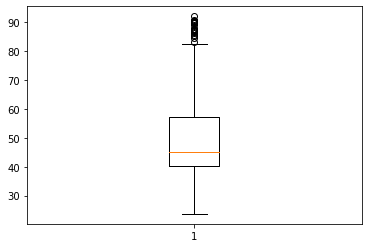

In [23]:
# boxplot
plt.boxplot(df['overall'])
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

<AxesSubplot:xlabel='overall'>

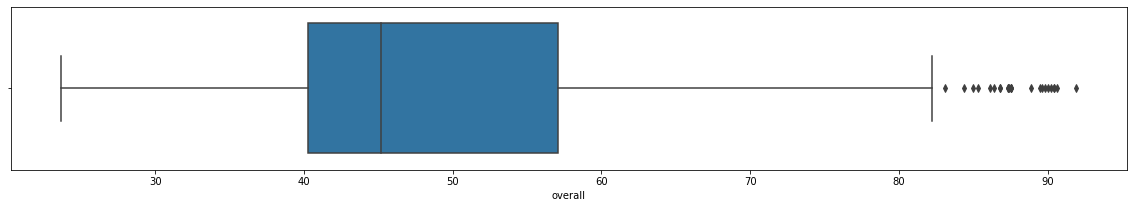

In [24]:
sn.boxplot(x=df['overall'])

In [25]:
# 5 IQR rules
q1 = np.quantile(df['overall'], 0.25)
q3 = np.quantile(df['overall'], 0.75)
# finding the iqr region
iqr = q3-q1
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

16.800000000000004 82.30000000000001 15.09999999999999


In [26]:
df.loc[(df['overall']<=lower_bound)|(df['overall']>=upper_bound)] 

rank              ranking-institution-title  \
0     1                     Harvard University   
1     2                    Columbia University   
2     3  Massachusetts Institute of Technology   
3     3                    Stanford University   
4     5                        Duke University   
5     6                        Yale University   
6     7     California Institute of Technology   
7     8             University of Pennsylvania   
8     9                   Princeton University   
9    10                     Cornell University   
10   11                       Brown University   
11   11                  University of Chicago   
12   11      Washington University in St Louis   
13   14                        Rice University   
14   15                Northwestern University   
15   15      University of Southern California   
16   17                      Dartmouth College   
17   17               Johns Hopkins University   
18   19                       Emory University   
19   20             Carnegie Mellon University   
20   21                  Vanderbilt University   
21   22                       Williams College   
22   23                        Amherst College   
23   24               University of Notre Dame   

                       ranking-institution-title href        location  \
0   https://www.timeshighereducation.com/world-uni...   Massachusetts   
1   https://www.timeshighereducation.com/world-uni...        New York   
2   https://www.timeshighereducation.com/world-uni...   Massachusetts   
3   https://www.timeshighereducation.com/world-uni...      California   
4   https://www.timeshighereducation.com/world-uni...  North Carolina   
5   https://www.timeshighereducation.com/world-uni...     Connecticut   
6   https://www.timeshighereducation.com/world-uni...      California   
7   https://www.timeshighereducation.com/world-uni...    Pennsylvania   
8   https://www.timeshighereducation.com/world-uni...      New Jersey   
9   https://www.timeshighereducation.com/world-uni...        New York   
10  https://www.timeshighereducation.com/world-uni...    Rhode Island   
11  https://www.timeshighereducation.com/world-uni...        Illinois   
12  https://www.timeshighereducation.com/world-uni...        Missouri   
13  https://www.timeshighereducation.com/world-uni...           Texas   
14  https://www.timeshighereducation.com/world-uni...        Illinois   
15  https://www.timeshighereducation.com/world-uni...      California   
16  https://www.timeshighereducation.com/world-uni...   New Hampshire   
17  https://www.timeshighereducation.com/world-uni...        Maryland   
18  https://www.timeshighereducation.com/world-uni...         Georgia   
19  https://www.timeshighereducation.com/world-uni...    Pennsylvania   
20  https://www.timeshighereducation.com/world-uni...       Tennessee   
21  https://www.timeshighereducation.com/world-uni...   Massachusetts   
22  https://www.timeshighereducation.com/world-uni...   Massachusetts   
23  https://www.timeshighereducation.com/world-uni...         Indiana   

    overall  resources  engagement  outcomes  enviroment      c  
0      91.9       29.8        15.6      39.5         7.0   91.9  
1      90.6       27.0        16.7      39.0         7.8   90.6  
2      90.4       29.2        15.8      38.2         7.2   90.4  
3      90.4       26.2        17.4      38.9         7.9   90.4  
4      90.2       26.7        17.2      39.5         6.8   90.2  
5      90.0       26.8        16.9      39.3         7.2  900.0  
6      89.8       30.0        14.6      38.8         6.4   89.8  
7      89.6       27.0        17.3      38.4         6.9   89.6  
8      89.5       28.1        15.6      39.1         6.8   89.5  
9      88.9       26.8        17.5      38.1         6.6   88.9  
10     87.5       26.8        17.7      36.1         7.0   87.5  
11     87.5       26.9        15.5      38.2         6.8   87.5  
12     87.5       26.2        17.6      37.6         6.2   87.5  
13

#### Duplicate 

In [27]:
df[df.duplicated()] # break down in same ranking & overal score and all the other scores....

Empty DataFrame
Columns: [rank, ranking-institution-title, ranking-institution-title href, location, overall, resources, engagement, outcomes, enviroment, c]
Index: []

### Univariate Analysis

In [28]:
# numerical
df.describe() # only summarize statistic for each numeric columns

overall    resources   engagement     outcomes  enviroment  \
count  1056.000000  1056.000000  1056.000000  1056.000000  760.000000   
mean     46.413258     8.978504    10.895170    12.048390    5.463026   
std      16.529268     8.685658     7.558396    11.952254    1.768205   
min      23.700000     0.000000     0.000000     0.000000    1.300000   
25%      40.300000     0.000000     0.000000     0.000000    4.300000   
50%      45.200000    11.200000    15.700000    14.950000    5.650000   
75%      57.100000    16.200000    16.400000    21.600000    6.700000   
max      91.900000    30.000000    18.200000    39.500000    9.300000   

                 c  
count  1056.000000  
mean     69.637689  
std     119.305546  
min      23.700000  
25%      40.300000  
50%      45.200000  
75%      58.325000  
max     900.000000

In [29]:
df['overall'].value_counts(normalize=True)

23.7    0.237689
40.3    0.190341
45.2    0.089962
48.2    0.008523
52.3    0.006629
          ...   
62.6    0.000947
81.1    0.000947
89.6    0.000947
56.6    0.000947
60.2    0.000947
Name: overall, Length: 247, dtype: float64

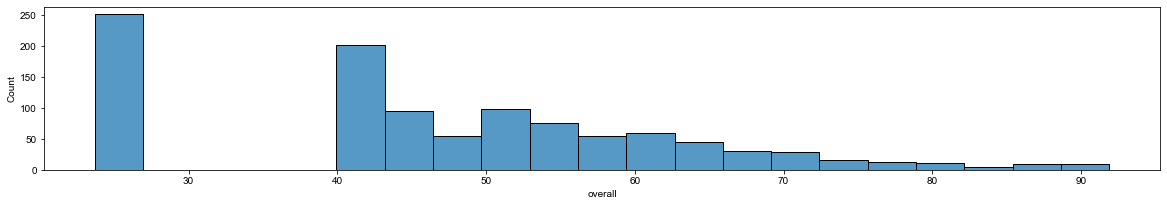

In [30]:
sn.histplot(x='overall', data=df)
sn.set(rc={'figure.figsize':(15,5)})


<AxesSubplot:xlabel='overall'>

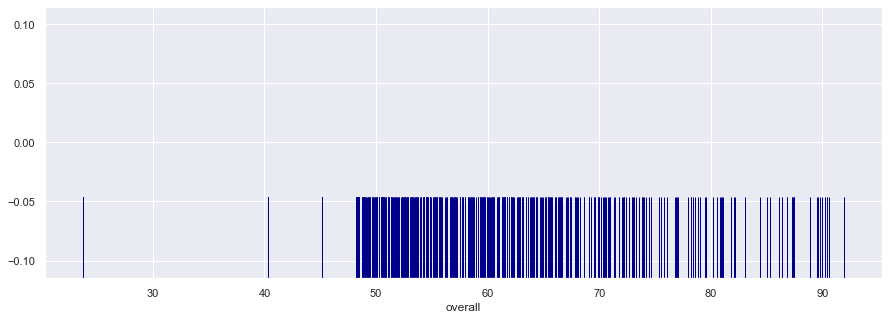

In [31]:
# density
sn.rugplot(x='overall', data=df, height=0.3, color='darkblue')

<AxesSubplot:>

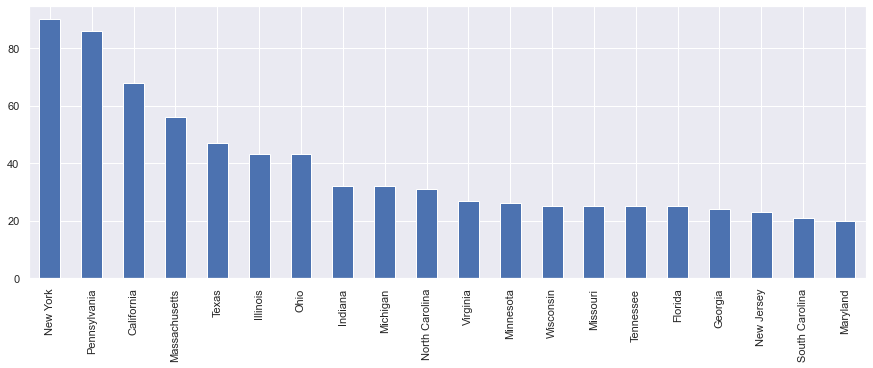

In [32]:
# categorical 
df['location'].value_counts().head(20).plot(kind='bar')

### Bivaraiate Analysis

In [33]:
# categorical
df.groupby(['location','overall']).count()

rank  ranking-institution-title  \
location  overall                                    
Alabama   23.7        7                          7   
          40.3        4                          4   
          45.2        1                          1   
          48.4        1                          1   
          49.3        1                          1   
...                 ...                        ...   
Wisconsin 60.5        1                          1   
          61.7        1                          1   
          63.2        1                          1   
          71.8        1                          1   
Wyoming   52.5        1                          1   

                   ranking-institution-title href  resources  engagement  \
location  overall                                                          
Alabama   23.7                                  7          7           7   
          40.3                                  4          4           4   
          45.2                                  1          1           1   
          48.4                                  1          1           1   
          49.3                                  1          1           1   
...                                           ...        ...         ...   
Wisconsin 60.5                                  1          1           1   
          61.7                                  1          1           1   
          63.2                                  1          1           1   
          71.8                                  1          1           1   
Wyoming   52.5                                  1          1           1   

                   outcomes  enviroment  c  
location  overall                           
Alabama   23.7            7           3  7  
          40.3            4           3  4  
          45.2            1           0  1  
          48.4            1           1  1  
          49.3            1           1  1  
...                     ...         ... ..  
Wisconsin 60.5            1           1  1  
          61.7            1           1  1  
          63.2            1           1  1  
          71.8            1           1  1  
Wyoming   52.5            1           1  1  

[612 rows x 8 columns]

### Correlation Analysis

<AxesSubplot:>

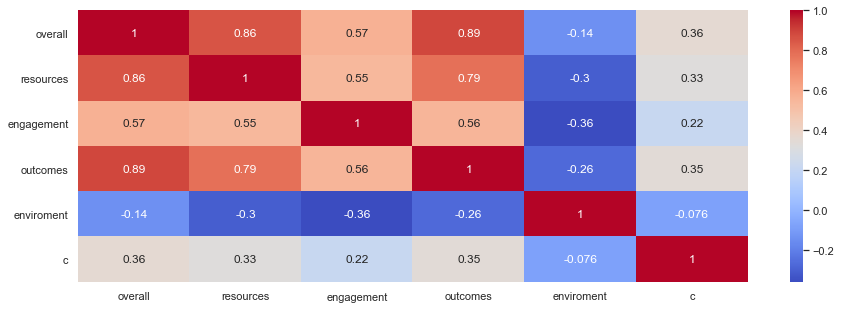

In [40]:
# resource and overall are highly correlated
# outcome and overall are highly correlated

sn.heatmap(df.corr(), annot = True, cmap= 'coolwarm')


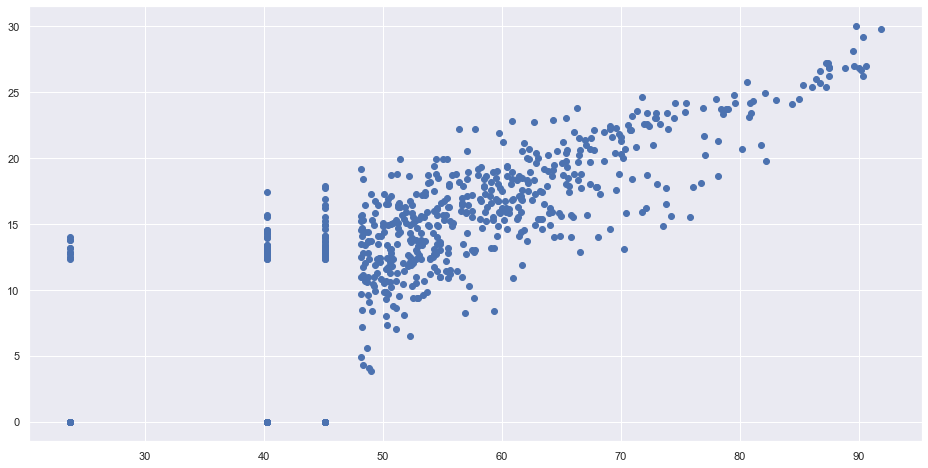

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['overall'] , df['resources'])
plt.show()

### EDA Library

In [35]:
# %pip install pandas-profiling

In [36]:
from pandas_profiling import ProfileReport

In [37]:
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]